In [124]:
import pandas as pd
import numpy as np
data = pd.read_csv("social_data.xlsx - Data.csv")

data['Engagement Rate'] = (data['Total Engagements'] / data['Total Impressions']) * 100

#Remove 
data['Spam'] = ((data['Total Engagements'] < 3) | (data['Engagement Rate'] > 100))
df=data[data['Spam']==False].copy()
#Trim words
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## drop duplicates
df = df.sort_values('Total Engagements', ascending=False)
df = df.drop_duplicates(subset='Published Date', keep='first').sort_values('Published Date', ascending=False)

# Convert the 'Date' column to datetime format
df['Published Date'] = pd.to_datetime(df['Published Date'])


#useless
df.drop(df[df['Media Type']=='Album'].index, inplace=True)
df

from scipy import stats
import copy
df_removed_outliers = copy.copy(df)
df_removed_outliers = df.where(np.abs(stats.zscore(df['Engagement Rate'])) < 2) #Removing outliers above 2 standard deviations
df = df_removed_outliers
df = df.dropna()
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Spam
4,2023-03-31 19:43:00,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,12.766628,False
6,2023-03-31 19:40:00,CSGO,TWITTER,Community Engagement,1882.0,83.0,Photo,4.410202,False
7,2023-03-31 19:23:00,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,17.192041,False
9,2023-03-31 18:55:00,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,10.429581,False
11,2023-03-31 18:30:00,DOTA2,TWITTER,N/A,1013.0,153.0,Link,15.103653,False
...,...,...,...,...,...,...,...,...,...
3461,2023-01-04 14:57:00,General,FBPAGE,Community Engagement,155521.0,19098.0,Photo,12.280014,False
3463,2023-01-04 13:17:00,General,TWITTER,N/A,393.0,18.0,Text,4.580153,False
3464,2023-01-04 13:00:00,General,TWITTER,Community Engagement,136660.0,2371.0,Photo,1.734963,False
3470,2023-01-03 13:34:00,General,TWITTER,N/A,7704.0,153.0,Text,1.985981,False


## 1. What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?


In [132]:
# Calculate the average engagement rate
average_engagement_rate = round(df['Engagement Rate'].mean(), 2)
print(f'The mean engagement rate is: {average_engagement_rate}%')



The mean engagement rate is: 4.79%


In [61]:
# Calculate the likelihood of achieving a 15% engagement rate P(engagament > 0.15)
likelihood = (df['Engagement Rate'] >= 15).mean() * 100
print(f'The likelihood of achieving a 15% engagement rate is: {likelihood.round(2)}%')


The likelihood of achieving a 15% engagement rate is: 5.71%


## 2. Does day of the week and time of posting affect engagement rates?

In [62]:
df['DayOfWeek'] = df['Published Date'].dt.strftime("%A")
df['Hour'] = df["Published Date"].dt.hour
df.head(20)

/var/folders/gm/mcjzktw10nscyj_dytfhfpv40000gn/T/ipykernel_987/2656350491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Published Date'].dt.strftime("%A")
/var/folders/gm/mcjzktw10nscyj_dytfhfpv40000gn/T/ipykernel_987/2656350491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df["Published Date"].dt.hour


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Spam,DayOfWeek,Hour
4,2023-03-31 19:43:00,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,12.766628,False,Friday,19
6,2023-03-31 19:40:00,CSGO,TWITTER,Community Engagement,1882.0,83.0,Photo,4.410202,False,Friday,19
7,2023-03-31 19:23:00,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,17.192041,False,Friday,19
9,2023-03-31 18:55:00,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,10.429581,False,Friday,18
11,2023-03-31 18:30:00,DOTA2,TWITTER,N/A,1013.0,153.0,Link,15.103653,False,Friday,18
12,2023-03-31 18:28:00,DOTA2,TWITTER,N/A,4630.0,339.0,Photo,7.321814,False,Friday,18
13,2023-03-31 18:21:00,CSGO,TWITTER,Community Engagement,2289.0,41.0,Photo,1.791175,False,Friday,18
14,2023-03-31 17:11:00,General,TWITTER,Community Engagement,5216.0,113.0,Text,2.166411,False,Friday,17
15,2023-03-31 17:09:00,CSGO,TWITTER,Community Engagement,841.0,13.0,Photo,1.545779,False,Friday,17
17,2023-03-31 16:50:00,General,TWITTER,Community Engagement,8321.0,133.0,Text,1.598366,False,Friday,16


In [63]:
# Group by day of week and hour, and calculate the average engagement rate
average_engagement_by_day = df.groupby('DayOfWeek')['Engagement Rate'].mean().round(2)
average_engagement_by_hour = df.groupby('Hour')['Engagement Rate'].mean().round(2)


In [64]:
# Manually sort the days of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_engagement_by_day = average_engagement_by_day.reindex(days)
average_engagement_by_day

DayOfWeek
Sunday       5.05
Monday       3.84
Tuesday      5.52
Wednesday    4.24
Thursday     5.36
Friday       4.78
Saturday     3.93
Name: Engagement Rate, dtype: float64

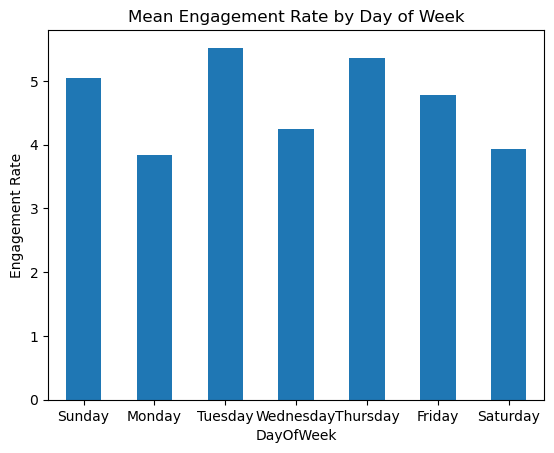

In [65]:
# Plot the mean engagement rate by day of week
import matplotlib.pyplot as plt
average_engagement_by_day.plot(kind='bar', title='Mean Engagement Rate by Day of Week', rot=0)
plt.ylabel('Engagement Rate')
plt.show()
print("")

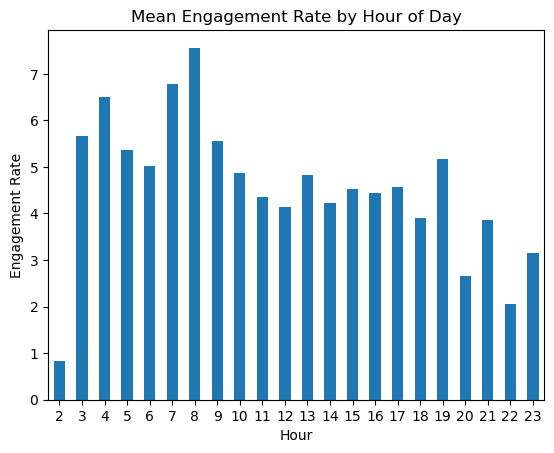

In [66]:
# Plot the mean engagement rate by hour of day
average_engagement_by_hour.plot(kind='bar', title='Mean Engagement Rate by Hour of Day',rot=0)
plt.ylabel('Engagement Rate')
plt.show()
print("")

In [67]:
# Group by day of week and hour, and calculate the average engagement rate
grouped = df.groupby(['DayOfWeek', 'Hour'])['Engagement Rate'].mean().unstack().reindex(days).transpose()
grouped

DayOfWeek,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Hour,,,,,,,
2,NaN,NaN,0.840156,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.589022,1.876554,7.922146,6.849869
4,NaN,NaN,NaN,1.856018,2.197654,18.358676,5.532754
5,NaN,NaN,4.497751,7.445733,2.827854,5.800407,3.929694
6,3.449765,2.458785,5.516380,5.290403,6.224154,5.625513,4.809315
7,10.870171,4.874083,6.320893,6.301447,5.520742,7.487913,6.645563
8,8.768013,3.560355,6.240742,5.367587,10.012742,8.804625,10.160275
9,5.867472,3.412783,5.022086,5.098696,7.473019,5.809912,4.935710
10,2.725636,6.095734,4.826675,4.012947,5.810881,5.826646,4.216313


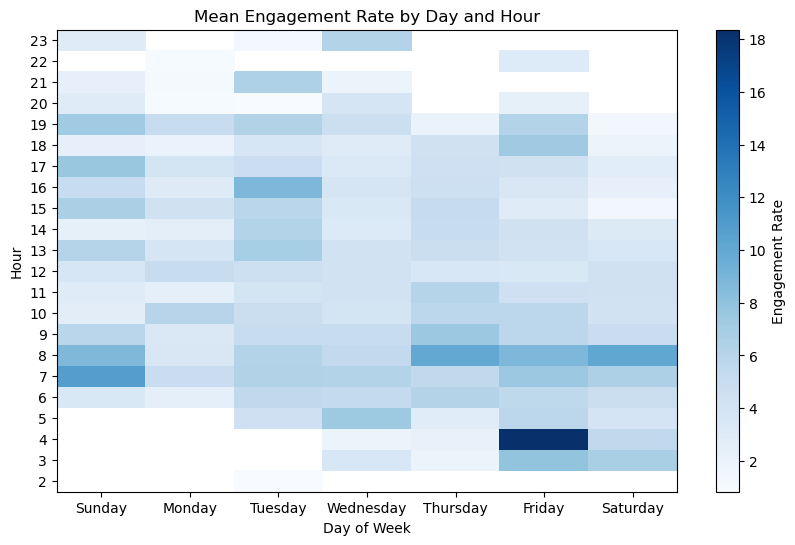

In [68]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.pcolor(grouped, cmap='Blues')
plt.yticks(np.arange(0.5, len(grouped.index), 1), grouped.index)
plt.xticks(np.arange(0.5, len(grouped.columns), 1), grouped.columns)
plt.title('Mean Engagement Rate by Day and Hour')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.colorbar(label='Engagement Rate')
plt.show()

Based on the analysis, day of the week and time of posting do play an affect on engagement rates. In the result, the mean engagement rate by day of the week seems to be the highest on Tuesdays and Thursdays. Moreover, the prime hour that produces the highest mean engagement rate by hour of day is at 8am. While I am not entirely sure why Tuesdays and Thursdays produces the highest mean engagement rate by day of the week, however, the prime time of posting makes a lot of sense as that is the time in which most working adults and students wake up and tend to scroll on their phone. 

With the 3rd graph, by indexing with hour and day of week, it appears that Friday at 3am has the highest engagement rate, which does not support my initial findings. After taking a deeper analysis on the data, I found that there is only one single data point in the hour on Friday with a high engagement rate. With the lack of sample in the combination for Friday, the graph proves to be an inaccurate representative. 


## 3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?


In [171]:
df.groupby(['Account']).sum()

/var/folders/gm/mcjzktw10nscyj_dytfhfpv40000gn/T/ipykernel_1780/4212914418.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Account']).sum()


,Total Impressions,Total Engagements,Engagement Rate,Spam
Account,,,,
CSGO,2304526,92021,804.463696,0
Content Creators,25696,862,134.336825,0
DOTA2,818993,55871,1894.582125,0
General,28504237,2793553,8234.574800,0
Valorant,22003,882,105.198884,0


The best game title in terms of social performance is DOTA2 with the highest engagement rate. 

## 4. What media type performs the best?

In [69]:
df.groupby(["Media Type"]).mean()


/var/folders/gm/mcjzktw10nscyj_dytfhfpv40000gn/T/ipykernel_987/2423456621.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Media Type"]).mean()


,Total Impressions,Total Engagements,Engagement Rate,Hour
Media Type,,,,
Carousel,16856.250000,680.500000,3.976683,13.500000
Link,5175.571429,59.238095,3.738367,12.047619
Mixed,45739.000000,3322.750000,8.864821,12.000000
Photo,23113.386266,1285.582260,4.789706,13.128755
Text,5858.331808,380.068650,4.008968,12.446224
Video,14793.659051,1037.455185,5.404457,12.386643


Mixed type media seems to be doing the best with the highest average in total impressions and total engagements. 

## 5. What is our best performing campaign?

In [70]:
df.groupby(["Campaign Name", "Media Type"]). mean()

/var/folders/gm/mcjzktw10nscyj_dytfhfpv40000gn/T/ipykernel_987/3819564318.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Campaign Name", "Media Type"]). mean()


Total Impressions  Total Engagements  \
Campaign Name        Media Type                                         
Community Engagement Carousel         16856.250000         680.500000   
                     Link              8075.428571          50.857143   
                     Mixed            13178.000000         861.000000   
                     Photo            23104.753780        1204.490281   
                     Text             11719.580000         698.333333   
                     Video            15690.911017        1116.288136   
Evergreen            Video            14811.282051         432.320513   
Evil Exhibited       Link              5365.500000          72.250000   
                     Mixed            98264.000000        7122.000000   
                     Photo            40293.578947        1017.552632   
                     Text              1316.044776          45.970149   
                     Video            15786.513514         738.252252   
N/A                  Link              3069.700000          59.900000   
                     Mixed            35757.000000        2654.000000   
                     Photo            14977.775000        1647.556250   
                     Text              3245.359091         264.818182   
                     Video            12548.291667        1466.673611   

                                 Engagement Rate       Hour  
Campaign Name        Media Type                              
Community Engagement Carousel           3.976683  13.500000  
                     Link               1.140570  11.857143  
                     Mixed              6.533617  16.000000  
                     Photo              4.363726  13.421166  
                     Text               4.528586  12.866667  
                     Video              6.175248  13.097458  
Evergreen            Video              3.175312  11.615385  
Evil Exhibited       Link               1.630758  10.500000  
                     Mixed              7.247822  10.000000  
                     Photo              2.792384  12.381579  
                     Text               2.828107  11.582090  
                     Video              3.760633  11.018018  
N/A                  Link               6.399869  12.800000  
                     Mixed             10.838922  11.000000  
                     Photo              6.971116  12.637500  
                     Text               4.014309  12.422727  
                     Video              6.615786  12.694444

In [71]:
import pandas as pd


# Group the data by campaign and calculate the sum of total engagements
campaign_engagements = df.groupby('Campaign Name')['Total Engagements'].sum()

# Find the campaign with the highest total engagements
best_campaign = campaign_engagements.idxmax()

print("The best performing campaign based on total engagements is:", best_campaign)


The best performing campaign based on total engagements is: Community Engagement


## 6. Define out a posting strategy for our social channels based on your discoveries.

Based on the discoveries, mixed media seems to be the best performing type of media. Therefore, I would recommend that social channels focus posting mixed media as it retains the most engagement rate. I would also suggest Tuesdays and Thursdays to be the prime days of posting as it has the highest mean engagement rate by day of week. Lastly, I would recommend social channels to post at 8 in the morning as it produces the highest mean engagement rate by hour of day. 

## 7. What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

In [127]:
df.groupby([ "Account Type", "Account"]).mean().round(2)


/var/folders/gm/mcjzktw10nscyj_dytfhfpv40000gn/T/ipykernel_987/4003486319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby([ "Account Type", "Account"]).mean().round(2)


Total Impressions  Total Engagements  \
Account Type     Account                                                  
FBPAGE           General                    33327.57            4187.55   
INSTAGRAM        General                    17320.77             562.93   
LINKEDIN_COMPANY General                     1973.91              45.45   
TIKTOK_BUSINESS  General                     5067.39             290.49   
TWITTER          CSGO                       12002.74             479.28   
                 DOTA2                       1878.06             122.84   
                 General                    21111.34             544.00   
YOUTUBE          Content Creators            1507.65              49.53   
                 DOTA2                      17128.50            1150.25   
                 General                     2050.54              68.00   
                 Valorant                    1100.15              44.10   

                                   Engagement Rate  
Account Type     Account                            
FBPAGE           General                     11.28  
INSTAGRAM        General                      2.47  
LINKEDIN_COMPANY General                      2.07  
TIKTOK_BUSINESS  General                      6.46  
TWITTER          CSGO                         4.19  
                 DOTA2                        4.63  
                 General                      2.75  
YOUTUBE          Content Creators             4.24  
                 DOTA2                        6.26  
                 General                      3.24  
                 Valorant                     5.26

According to the table ahead, the mean of total impressions for TikTok is 5067.39, which seems to be on the lower end of the range, while the mean of total engagement is a mere 290.49. The engagement rate for TikTok is 6.46, which is not the highest. Therefore, I would not suggest the CSGO youtube channel to expand to TikTok. 